In [1]:
import pandas as pd

seed_path = '../../data/xdpole/curriculumstats/s11_run.csv'

df = pd.read_csv(seed_path)

In [2]:
import plotly.graph_objects as go

fg = go.Figure(
    layout=go.Layout(title='Specialist Score X Generation')
)

fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score,
            mode='lines',
            name='Raw'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score.rolling(80).mean(),
            mode='lines',
            name='Rolling Mean 80'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.specialist_score.rolling(160).mean(),
            mode='lines',
            name='Rolling Mean 160'
        ),
    )
)

fg.update_xaxes(title_text='Generation')
fg.update_yaxes(title_text='Score')
fg.show()

In [3]:
import plotly.graph_objects as go

fg = go.Figure(
    layout=go.Layout(title='Confusion Matrix Metrics X Generation')
)

fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.cm_true_positive,
            mode='lines',
            name='True Bad'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.cm_false_positive,
            mode='lines',
            name='False Bad'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.cm_true_negative,
            mode='lines',
            name='True Good'
        ),
    )
)
fg.add_trace(
    go.Scatter(
        go.Scatter(
            x=df.gen,
            y=df.cm_false_negative,
            mode='lines',
            name='False Good'
        ),
    )
)

fg.update_xaxes(title_text='Generation')
fg.update_yaxes(title_text='Number of Labels')
fg.show()

In [4]:
score_cycle = len(df.query('specialist_cycle == "score"'))
predict_cycle = len(df.query('specialist_score >= 0.7'))
fit_cycle = len(df.query('specialist_cycle == "fit"'))

fg = go.Figure(
    [go.Bar(
        x=['fit', 'score', 'predict'], y=[fit_cycle, score_cycle, predict_cycle]
    )],
    layout=go.Layout(title='Score, Fit, Predict Cycles')
)
fg.update_yaxes(title_text='Generations')
fg.update_xaxes(title_text='Cycle')
fg.show()

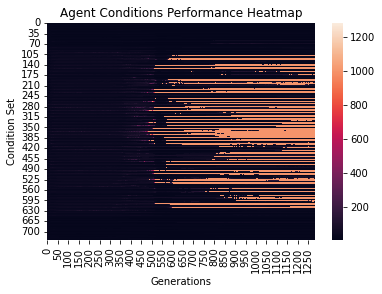

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

bc_path = '../../data/xdpole/baseconditions/s11_run.csv'

bc_df = pd.read_csv(bc_path, index_col=None)

sns.heatmap(bc_df.T)
plt.ylabel('Condition Set')
plt.xlabel('Generations')
plt.title('Agent Conditions Performance Heatmap')
plt.show()

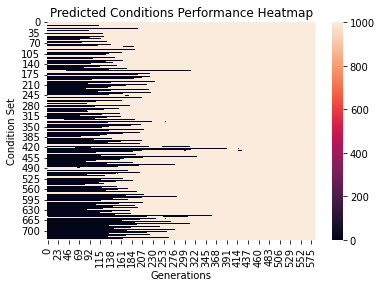

In [18]:
bc_predicted_path = '../../data/xdpole/predictedbaseconditions/s11_run.csv'

bc_predicted_df = pd.read_csv(bc_predicted_path, index_col=None)

bc_predicted_df *= 1000

sns.heatmap(bc_predicted_df.T, vmax=1000)
plt.ylabel('Condition Set')
plt.xlabel('Generations')
plt.title('Predicted Conditions Performance Heatmap')
plt.show()

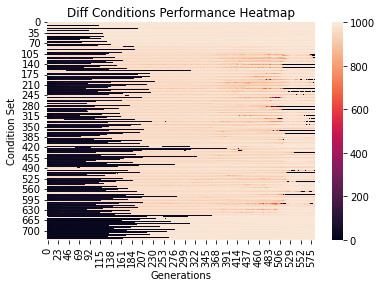

In [19]:
bc_diff = bc_predicted_df.copy()

bc_diff = bc_diff.subtract(bc_df)
bc_diff = bc_diff.dropna()

sns.heatmap(bc_diff.T.abs(), vmax=1000)
plt.ylabel('Condition Set')
plt.xlabel('Generations')
plt.title('Diff Conditions Performance Heatmap')
plt.show()
